In [1]:
import os
import pandas as pd
import glob
import csv
from os import listdir, path
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

C:\Users\B2_LocalUser\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
def process_csv_files(folder_path, column_name):
    for root, dirs, files in os.walk(folder_path):
        for filename in files:
            if filename.endswith(".csv"):
                file_path = os.path.join(root, filename)
                df = pd.read_csv(file_path)
                df.drop_duplicates(subset=column_name, keep='last', inplace=True)
                df.to_csv(file_path, index=False)

In [ ]:
folder_path = r'C:\myDrive\TuftsPhD2022\ProfMillerPhDResearch\PhDResearchProfMiller\Dataset\Data_Oct\1'
column_name = 'Time'
process_csv_files(folder_path, column_name)

### Validation Plot for Coordinate vs Time

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
files = glob.glob(r'C:\myDrive\TuftsPhD2022\ProfMillerPhDResearch\PhDResearchProfMiller\Dataset\Data_Oct\SavGol-101-TrainSet\Normal_12122023\MyOutput2/*.csv')

for file in files:
    df = pd.read_csv(file)
    plt.plot(df['Time'], df['PX'])

# Add labels and legend
plt.xlabel('Time ')
plt.ylabel('Position Z axis')
# Show the plot
plt.show()

### Acceleration Calculation with Savgol Filter

# W= 101

In [5]:
#TRAIN SET
directory = r'C:\myDrive\TuftsPhD2022\ProfMillerPhDResearch\PhDResearchProfMiller\Dataset\Data_Oct\SavGol-101-TrainSet\Normal11272023'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith('.csv'):
            csv_file_path = os.path.join(subdir, file)
            df = pd.read_csv(csv_file_path)
            pX = df['PositionX'].values
            pY = df['PositionY'].values
            pZ = df['PositionZ'].values
        
            reX= df['RotationEX'].values
            reY= df['RotationEY'].values
            reZ= df['RotationEZ'].values
            
            rtX = df['RotationTX'].values
            rtY = df['RotationTY'].values
            rtZ = df['RotationTZ'].values
            t = df['Time'].values
            dt = 0.02
            
            ax = signal.savgol_filter(pX, window_length=101, polyorder=3, deriv=2, delta=dt, mode="nearest")
            ay = signal.savgol_filter(pY, window_length=101, polyorder=3, deriv=2, delta=dt, mode="nearest")
            az = signal.savgol_filter(pZ, window_length=101, polyorder=3, deriv=2, delta=dt, mode="nearest")
            filtered_data = pd.DataFrame({
                                  'pX': pX,
                                  'pY': pY,
                                  'pZ': pZ,
                                  'aX': ax,
                                  'aY': ay,
                                  'aZ': az,
                                  'reX':reX,
                                  'reY':reY,
                                  'reZ':reZ,
                                  'rtX':rtX,
                                  'rtY':rtY,
                                  'rtZ':rtZ,
                                  't': t,})

            filtered_data.to_csv(csv_file_path, index=False)


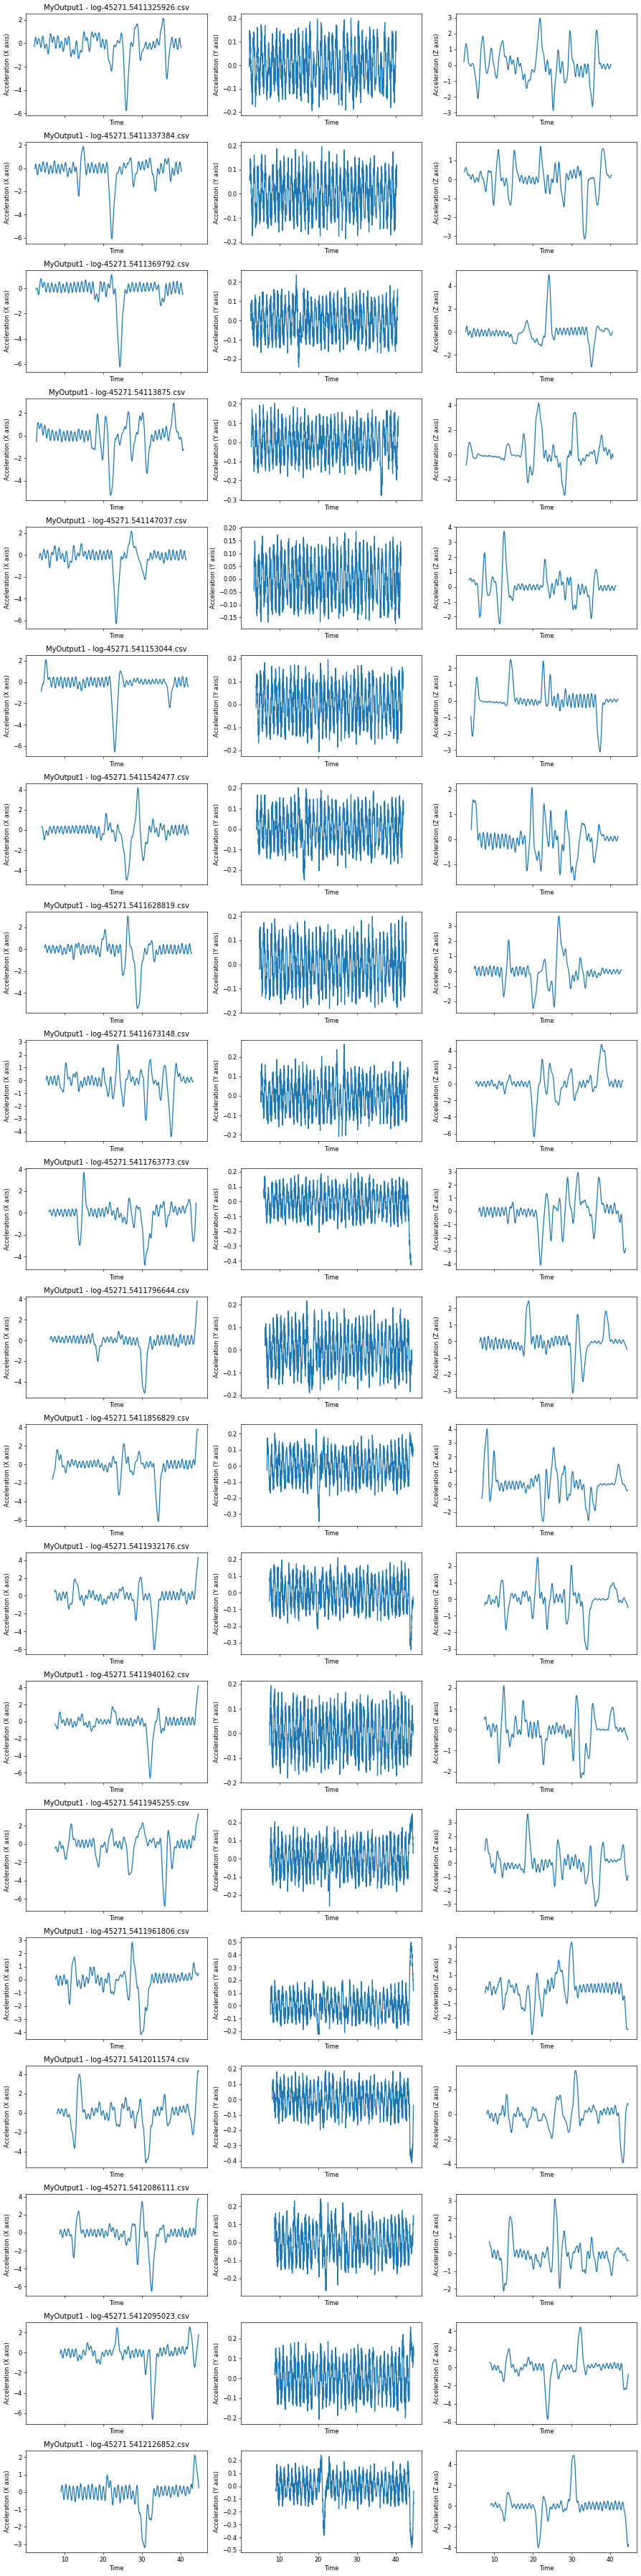

In [3]:
directory = r'C:\myDrive\TuftsPhD2022\ProfMillerPhDResearch\PhDResearchProfMiller\Dataset\Data_Oct\SavGol-101-TrainSet\Normal_12122023'
subfolder_name = "MyOutput1"

# Create subplots with 20 rows and 3 columns
fig, axs = plt.subplots(20, 3, figsize=(15, 60), dpi=60, sharex=True)

subfolder_path = os.path.join(directory, subfolder_name)
file_count = 0

for subdir, dirs, files in os.walk(subfolder_path):
    for file in files:
        if file_count < 20 and file.endswith('.csv'):
            csv_file_path = os.path.join(subdir, file)
            df = pd.read_csv(csv_file_path)
            
            t = df['t'].values[100:2000] 
            ax = df['aX'].values[100:2000] 
            ay = df['aY'].values[100:2000] 
            az = df['aZ'].values[100:2000] 

            axs[file_count, 0].plot(t, ax)
            axs[file_count, 0].set_title(f'{subfolder_name} - {file}')
            axs[file_count, 0].set_xlabel("Time")
            axs[file_count, 0].set_ylabel("Acceleration (X axis)")

            axs[file_count, 1].plot(t, ay)
            axs[file_count, 1].set_xlabel("Time")
            axs[file_count, 1].set_ylabel("Acceleration (Y axis)")

            axs[file_count, 2].plot(t, az)
            axs[file_count, 2].set_xlabel("Time")
            axs[file_count, 2].set_ylabel("Acceleration (Z axis)")

            file_count += 1

plt.tight_layout()
plt.show()

# W=111

In [ ]:
#TRAIN SET
directory = r'C:\myDrive\TuftsPhD2022\ProfMillerPhDResearch\PhDResearchProfMiller\Dataset\Data_Oct\AccVal\w101'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith('.csv'):
            csv_file_path = os.path.join(subdir, file)
            df = pd.read_csv(csv_file_path)
            pX = df['PX'].values
            pY = df['PY'].values
            pZ = df['PZ'].values
        
            reX= df['REX'].values
            reY= df['REY'].values
            reZ= df['REZ'].values
            
            rtX = df['RTX'].values
            rtY = df['RTY'].values
            rtZ = df['RTZ'].values
            t = df['Time'].values
            dt = 0.02
            
            ax = signal.savgol_filter(pX, window_length=111, polyorder=3, deriv=2, delta=dt, mode="nearest")
            ay = signal.savgol_filter(pY, window_length=111, polyorder=3, deriv=2, delta=dt, mode="nearest")
            az = signal.savgol_filter(pZ, window_length=111, polyorder=3, deriv=2, delta=dt, mode="nearest")
            filtered_data = pd.DataFrame({
                                  'pX': pX,
                                  'pY': pY,
                                  'pZ': pZ,
                                  'aX': ax,
                                  'aY': ay,
                                  'aZ': az,
                                  'reX':reX,
                                  'reY':reY,
                                  'reZ':reZ,
                                  'rtX':rtX,
                                  'rtY':rtY,
                                  'rtZ':rtZ,
                                  't': t,})

            filtered_data.to_csv(csv_file_path, index=False)


In [ ]:
directory = r'C:\myDrive\TuftsPhD2022\ProfMillerPhDResearch\PhDResearchProfMiller\Dataset\Data_Oct\AccVal\w101'
subfolder_name = "MyOutput1"

# Create subplots with 20 rows and 3 columns
fig, axs = plt.subplots(20, 3, figsize=(15, 60), dpi=60, sharex=True)

subfolder_path = os.path.join(directory, subfolder_name)
file_count = 0

for subdir, dirs, files in os.walk(subfolder_path):
    for file in files:
        if file_count < 20 and file.endswith('.csv'):
            csv_file_path = os.path.join(subdir, file)
            df = pd.read_csv(csv_file_path)
            
            t = df['t'].values[100:2000] 
            ax = df['aX'].values[100:2000] 
            ay = df['aY'].values[100:2000] 
            az = df['aZ'].values[100:2000] 

            axs[file_count, 0].plot(t, ax)
            axs[file_count, 0].set_title(f'{subfolder_name} - {file}')
            axs[file_count, 0].set_xlabel("Time")
            axs[file_count, 0].set_ylabel("Acceleration (X axis)")

            axs[file_count, 1].plot(t, ay)
            axs[file_count, 1].set_xlabel("Time")
            axs[file_count, 1].set_ylabel("Acceleration (Y axis)")

            axs[file_count, 2].plot(t, az)
            axs[file_count, 2].set_xlabel("Time")
            axs[file_count, 2].set_ylabel("Acceleration (Z axis)")

            file_count += 1

plt.tight_layout()
plt.show()

### Rounding Time

In [ ]:
for root, dirs, files in os.walk(root_path):
    for file in files:
        if file.endswith(".csv"):
            filename = os.path.join(root, file)
            df = pd.read_csv(filename)
            df['t'] = df['t'].round(1)

            df.to_csv(filename, index=False)